##### Creating a data frame and load data 

In [5]:
import pandas as pd

sales_data = {
    'order_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'date': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-02-01', '2023-02-10', '2023-03-05', '2023-03-15', '2023-04-01', '2023-05-01', '2023-06-01'],
    'customer_id': [101, 102, 101, 103, 104, 105, 101, 102, 106, 107],
    'product_id': [501, 502, 503, 501, 504, 505, 506, 507, 508, 509],
    'quantity': [2, 1, 1, 3, 2, 5, 2, 4, 3, 2],
    'price': [15.0, 25.0, 45.0, 15.0, 35.0, 10.0, 20.0, 30.0, 25.0, 50.0]
}
df = pd.DataFrame(sales_data)

#print the data 
print(df)

   order_id        date  customer_id  product_id  quantity  price
0         1  2023-01-01          101         501         2   15.0
1         2  2023-01-02          102         502         1   25.0
2         3  2023-01-03          101         503         1   45.0
3         4  2023-02-01          103         501         3   15.0
4         5  2023-02-10          104         504         2   35.0
5         6  2023-03-05          105         505         5   10.0
6         7  2023-03-15          101         506         2   20.0
7         8  2023-04-01          102         507         4   30.0
8         9  2023-05-01          106         508         3   25.0
9        10  2023-06-01          107         509         2   50.0


In [3]:
#Saving dataframe to a CSV file
df.to_csv('sales_data.csv',index=False)


In [6]:
#Loading saved sales_data.csv file
data = pd.read_csv('sales_data.csv')
print(data)

   order_id        date  customer_id  product_id  quantity  price
0         1  2023-01-01          101         501         2   15.0
1         2  2023-01-02          102         502         1   25.0
2         3  2023-01-03          101         503         1   45.0
3         4  2023-02-01          103         501         3   15.0
4         5  2023-02-10          104         504         2   35.0
5         6  2023-03-05          105         505         5   10.0
6         7  2023-03-15          101         506         2   20.0
7         8  2023-04-01          102         507         4   30.0
8         9  2023-05-01          106         508         3   25.0
9        10  2023-06-01          107         509         2   50.0


Data Cleaning

In [7]:
#checking for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n",missing_values)

Missing values in each column:
 order_id       0
date           0
customer_id    0
product_id     0
quantity       0
price          0
dtype: int64


In sales_data dataset there is no any missing values

In [9]:
#check the data type of each column
print("Data type of each column:\n",data.dtypes)

Data type of each column:
 order_id         int64
date            object
customer_id      int64
product_id       int64
quantity         int64
price          float64
dtype: object


Exploratory data analysis(EDA)

In [10]:
#Calculate the total sales 
data['total_sales'] = data['quantity']*data['price']
print(data)

   order_id        date  customer_id  product_id  quantity  price  total_sales
0         1  2023-01-01          101         501         2   15.0         30.0
1         2  2023-01-02          102         502         1   25.0         25.0
2         3  2023-01-03          101         503         1   45.0         45.0
3         4  2023-02-01          103         501         3   15.0         45.0
4         5  2023-02-10          104         504         2   35.0         70.0
5         6  2023-03-05          105         505         5   10.0         50.0
6         7  2023-03-15          101         506         2   20.0         40.0
7         8  2023-04-01          102         507         4   30.0        120.0
8         9  2023-05-01          106         508         3   25.0         75.0
9        10  2023-06-01          107         509         2   50.0        100.0


Determine the top 5 product by total sales

In [17]:
#calculate the total sales for each product id
product_sales  = data.groupby('product_id')['total_sales'].sum()

#sort  the product__sales with desceending order
sort_product_sales = product_sales.sort_values(ascending=False)

#get the top 5
print("Top 5 products by total sales:\n",sort_product_sales.head(5))



Top 5 products by total sales:
 product_id
507    120.0
509    100.0
501     75.0
508     75.0
504     70.0
Name: total_sales, dtype: float64


Plot the graph for monthly sales trend over  time

In [18]:
import matplotlib.pyplot as plt

#Convert string type of 'date' column in to datetime format
data['date'] = pd.to_datetime(data['date'])

#then extract month from each date
month_periods = data['date'].dt.to_period('M')

#group the data by month
grouped_data = data.groupby(month_periods)

#calculate the sum of total sales for each month
monthly_sales = grouped_data['total_sales'].sum()



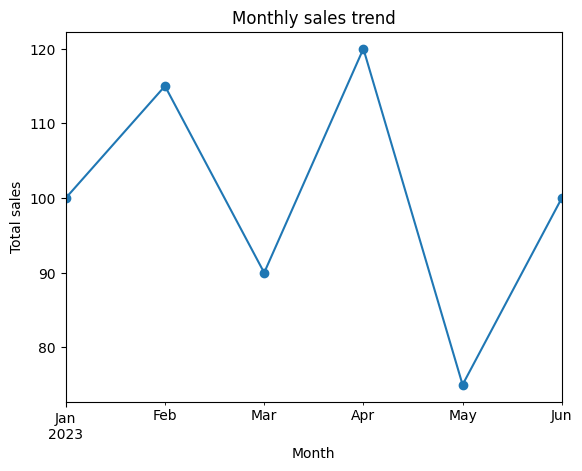

In [20]:
#Plot graph
monthly_sales.plot(marker = 'o')
plt.title('Monthly sales trend')
plt.xlabel('Month')
plt.ylabel('Total sales')
plt.show()


Bar chart for top five products

In [21]:
#lets get top five product using product_sales variable
top_5_product = product_sales.sort_values(ascending=False).head(5)

#then get product ids from top_5_products
product_ids = top_5_product.index

#get total sales from the top_5_products
total_sales = top_5_product.values

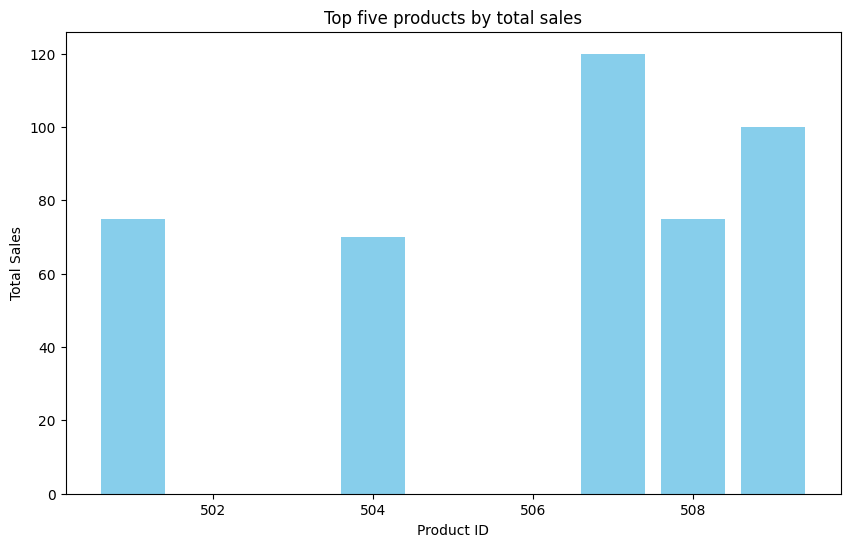

In [22]:
#plot bar chart
plt.figure(figsize=(10,6))
plt.bar(product_ids,total_sales,color='skyblue')
plt.title('Top five products by total sales')
plt.xlabel('Product ID')
plt.ylabel('Total Sales')
plt.show()


Calculate average order value(AOV)

In [23]:
#Average order value = Total sales/Total number of orders
#find total sales
total_sales = data['total_sales'].sum()

#find total number of orders
total_orders = len(data)

#Calculate AVO
aov = total_sales/total_orders

print("Average over value(AOV):",aov)

Average over value(AOV): 60.0


Determine the repeat purchase rate

In [24]:
#identify customers who made more than one purches
repeat_customers  = data['customer_id'].value_counts()[data['customer_id'].value_counts()>1]

#calculate the total number of unique customers
total_customers = len(data['customer_id'].unique())

#Calculate number of repeat customers
num_repeat_customers = len(repeat_customers)

#Calculate number of repeat purchase rate
repeat_purchase_rate = (num_repeat_customers/total_customers)*100

print("Repeat purchase rate:",repeat_purchase_rate,"%")

Repeat purchase rate: 28.57142857142857 %
